### 다중공선성 확인용 -> 연구에 반영 X

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df_a = pd.read_csv("./2020/최종데이터_a.csv")
df_b = pd.read_csv("./2020/최종데이터_b.csv")

A case

In [10]:
df_a.columns

Index(['id', 'week', 'week_start_date', 'obj_num', 'flw_get', 'height_pl',
       'num_leaf', 'len_leaf', 'width_leaf', 'unit_len', 'dim_pipe',
       'temp_ex_max', 'temp_ex_min', 'temp_ex_mean', 's_am_max', 's_am_min',
       's_am_mean', 'temp_int_max', 'temp_int_min', 'temp_int_mean',
       'hum_int_max', 'hum_int_min', 'hum_int_mean', 'CO2_max', 'CO2_min',
       'CO2_mean', 'soil_temp_max', 'soil_temp_min', 'soil_temp_mean'],
      dtype='object')

In [11]:
cols = df_a.columns[4:]
corr = df_a[cols].corr(method = 'pearson')
corr

,flw_get,height_pl,num_leaf,len_leaf,width_leaf,unit_len,dim_pipe,temp_ex_max,temp_ex_min,temp_ex_mean,...,temp_int_mean,hum_int_max,hum_int_min,hum_int_mean,CO2_max,CO2_min,CO2_mean,soil_temp_max,soil_temp_min,soil_temp_mean
flw_get,1.000000,0.224097,0.397047,-0.034598,-0.014620,0.224686,0.274416,-0.192626,-0.292588,-0.248510,...,-0.276817,0.092409,0.001504,0.057958,0.267521,0.069593,0.229678,-0.141785,-0.145974,-0.166395
height_pl,0.224097,1.000000,0.137208,0.196936,0.033706,0.711735,0.180949,-0.317626,-0.367121,-0.357112,...,-0.422537,0.040410,0.004667,0.026506,0.068894,0.084549,0.088424,-0.352493,-0.499093,-0.516844
num_leaf,0.397047,0.137208,1.000000,-0.247626,-0.164630,-0.002617,0.247308,0.031092,-0.101329,-0.033033,...,-0.051358,0.322361,0.145249,0.231005,0.167009,-0.072049,0.046462,0.071868,-0.129200,-0.077702
len_leaf,-0.034598,0.196936,-0.247626,1.000000,0.787753,0.371385,-0.227818,-0.066753,-0.057732,-0.073161,...,-0.093357,0.008287,0.018583,0.034673,-0.146518,-0.157779,-0.151713,-0.021278,-0.080611,-0.090311
width_leaf,-0.014620,0.033706,-0.164630,0.787753,1.000000,0.180431,-0.154601,0.026185,-0.055004,-0.026618,...,0.008814,-0.144688,-0.115025,-0.106523,-0.191018,-0.156889,-0.130053,0.089424,0.016677,0.038185
unit_len,0.224686,0.711735,-0.002617,0.371385,0.180431,1.000000,0.166747,-0.275609,-0.296638,-0.299199,...,-0.375054,0.013816,0.008007,0.022879,0.051831,0.040949,0.066140,-0.319584,-0.409559,-0.432677
dim_pipe,0.274416,0.180949,0.247308,-0.227818,-0.154601,0.166747,1.000000,-0.140765,-0.134979,-0.136467,...,-0.070152,0.161294,-0.045289,0.065450,0.279674,0.107327,0.300823,0.010612,-0.175279,-0.133354
temp_ex_max,-0.192626,-0.317626,0.031092,-0.066753,0.026185,-0.275609,-0.140765,1.000000,0.839412,0.949871,...,0.780914,-0.111782,-0.284456,-0.282642,-0.201079,-0.103393,-0.241540,0.268724,0.171277,0.273443
temp_ex_min,-0.292588,-0.367121,-0.101329,-0.057732,-0.055004,-0.296638,-0.134979,0.839412,1.000000,0.964178,...,0.795221,-0.068222,-0.126300,-0.136870,-0.297067,-0.047288,-0.270437,0.206518,0.270941,0.326582
temp_ex_mean,-0.248510,-0.357112,-0.033033,-0.073161,-0.026618,-0.299199,-0.136467,0.949871,0.964178,1.000000,...,0.822701,-0.087590,-0.205058,-0.210426,-0.259607,-0.076910,-0.268313,0.244242,0.232492,0.313601


In [17]:
# heatmap 으로 시각화
# heatmap 으로 시각화

def corr_heatmap(corr) :
    fig = plt.figure(figsize = (18, 15))
    ax = fig.gca()

    # sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
    heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                        yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
    plt.tight_layout() ## 여백을 조정
    plt.show()

c:\Users\mool8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\mool8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


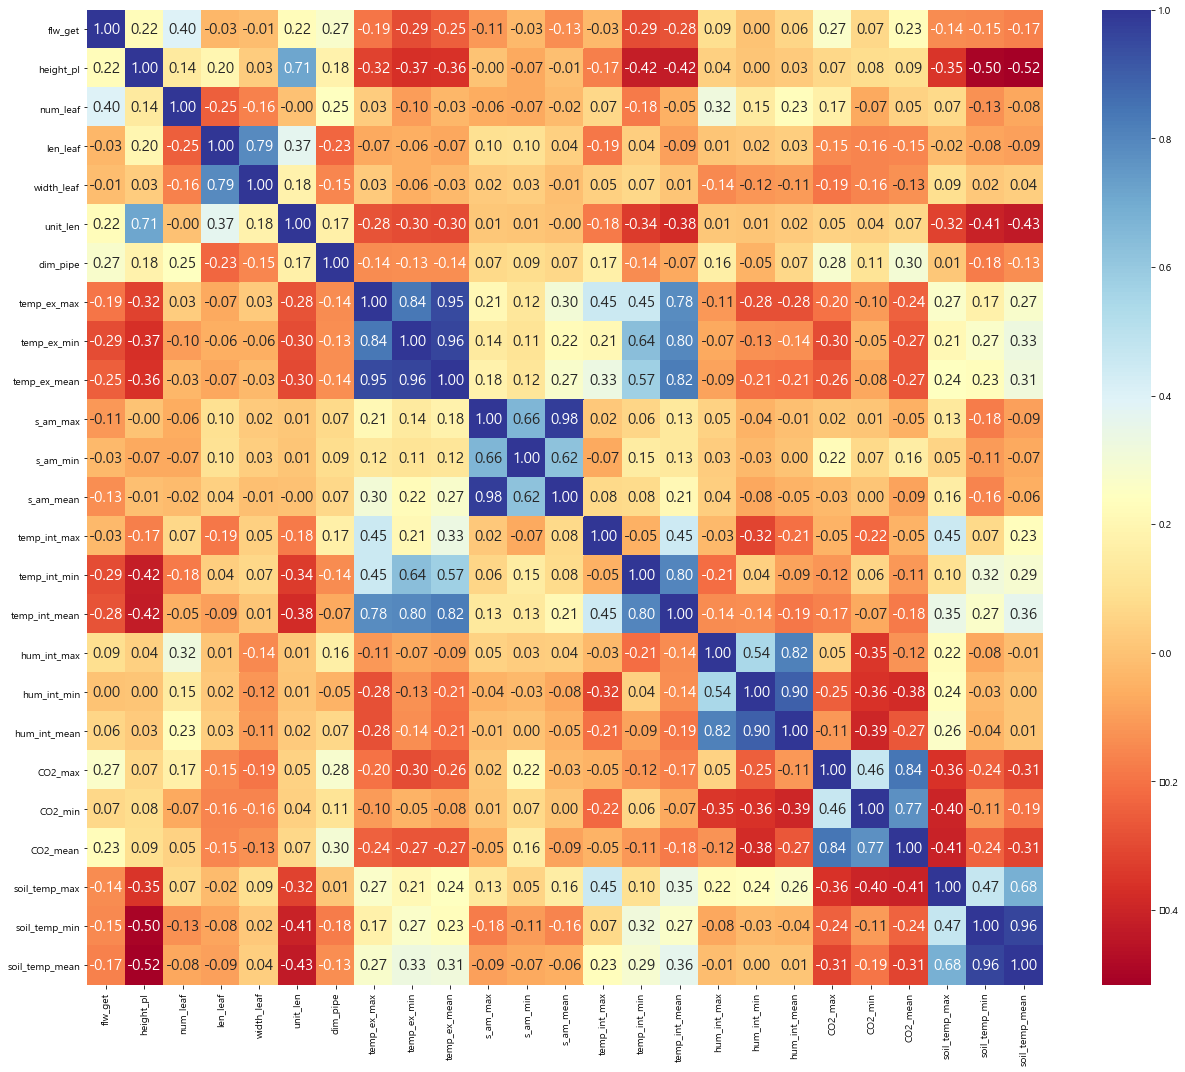

In [18]:
cols = df_a.columns[4:]
corr_heatmap(df_a[cols].corr(method = 'pearson'))

In [3]:
df_a.columns

Index(['id', 'week', 'week_start_date', 'obj_num', 'flw_get', 'height_pl',
       'num_leaf', 'len_leaf', 'width_leaf', 'unit_len', 'dim_pipe',
       'temp_ex_max', 'temp_ex_min', 'temp_ex_mean', 's_am_max', 's_am_min',
       's_am_mean', 'temp_int_max', 'temp_int_min', 'temp_int_mean',
       'hum_int_max', 'hum_int_min', 'hum_int_mean', 'CO2_max', 'CO2_min',
       'CO2_mean', 'soil_temp_max', 'soil_temp_min', 'soil_temp_mean'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

x_cols = ['height_pl', 'num_leaf', 'len_leaf', 'width_leaf', 'unit_len', 'dim_pipe',
       'temp_ex_max', 'temp_ex_min', 's_am_max', 's_am_min',
       'temp_int_max', 'temp_int_min', 
       'hum_int_max', 'hum_int_min', 'CO2_max', 'CO2_min',
       'soil_temp_max', 'soil_temp_min']

# split dataset into training & test
X = df_a[x_cols]
y = df_a["flw_get"]

# random sampling, 무작위로 split함

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1) # 실수부 1번째자리까지 표현하도록

,features,VIF Factor
0,height_pl,63.5
1,num_leaf,11.2
2,len_leaf,72.5
3,width_leaf,45.4
4,unit_len,28.4
5,dim_pipe,26.9
6,temp_ex_max,28.2
7,temp_ex_min,6.1
8,s_am_max,9.9
9,s_am_min,4.3


B case

c:\Users\mool8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\mool8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


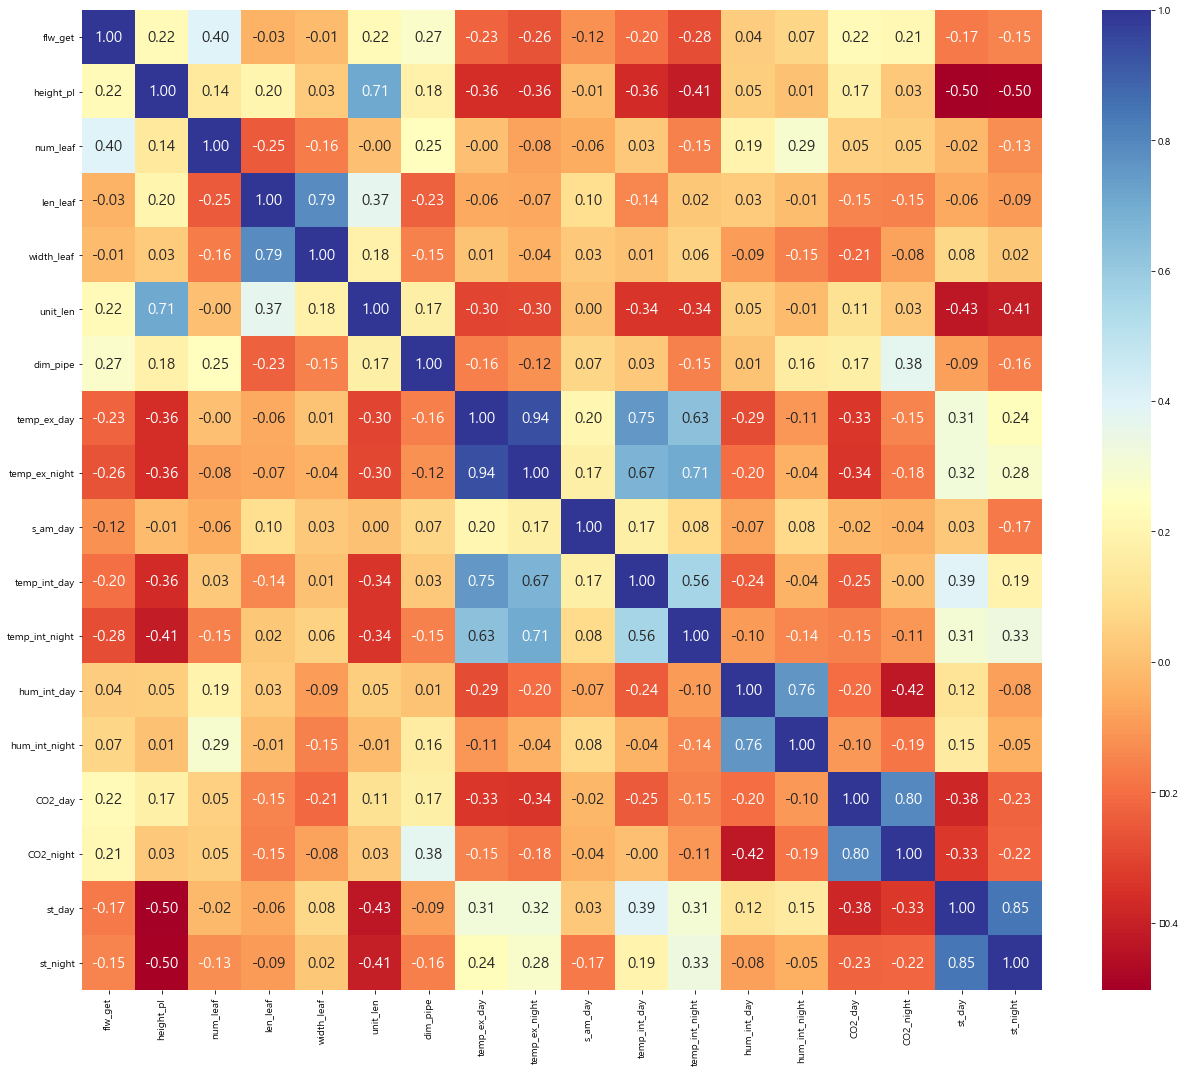

In [20]:
cols = df_b.columns[4:]
corr_heatmap(df_b[cols].corr(method = 'pearson'))

In [23]:
from sklearn.model_selection import train_test_split

x_cols = cols[1:]

# split dataset into training & test
X = df_b[x_cols]
y = df_b["flw_get"]

# random sampling, 무작위로 split함

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1) # 실수부 1번째자리까지 표현하도록

,features,VIF Factor
0,height_pl,60.5
1,num_leaf,10.9
2,len_leaf,66.6
3,width_leaf,43.6
4,unit_len,28.5
5,dim_pipe,32.7
6,temp_ex_day,47.0
7,temp_ex_night,18.4
8,s_am_day,6.8
9,temp_int_day,249.2
